In [14]:
## load libraries
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(colorspace)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))

In [15]:
predict_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results_selected_markers_data/"

In [16]:
tests = read.csv(paste0(predict_folder, "test_results.tsv"), sep = "\t")
head(tests)

timepoint1,gene1,timepoint2,gene2,coefficient,pval
day2,pseudotime,day3,pseudotime,0.45514869,2.521506e-11
day2,NANOG,day3,pseudotime,-0.03843010,2.797062e-09
day2,GATA6,day3,pseudotime,0.03138475,4.638677e-09
day1,DKK1,day3,pseudotime,0.01381831,5.385268e-08
day2,SOX2,day3,pseudotime,-0.05140022,4.866488e-07
day2,EOMES,day3,pseudotime,0.03864793,7.024248e-06


In [17]:
tests0 = tests[tests$timepoint1 == "day0" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests1 = tests[tests$timepoint1 == "day1" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests2 = tests[tests$timepoint1 == "day2" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]

In [18]:
df0 = inner_join(tests0, tests1, by = c("gene1","timepoint2","gene2"), suffix = c(".day0",".day1"))
df = inner_join(df0, tests2, by = c("gene1","timepoint2","gene2"))
colnames(df)[(ncol(df)-2):ncol(df)] <- c("timepoint1.day2","coefficient.day2","pval.day2")
head(df)

timepoint1.day0,gene1,timepoint2,gene2,coefficient.day0,pval.day0,timepoint1.day1,coefficient.day1,pval.day1,timepoint1.day2,coefficient.day2,pval.day2
day0,CXCR4,day3,pseudotime,-0.050636457,0.01872756,day1,-0.02289775,4.553970e-01,day2,0.004708433,3.520249e-01
day0,SOX17,day3,pseudotime,-0.244812065,0.02226053,day1,0.03322365,3.818626e-01,day2,0.006186556,3.441315e-02
day0,T,day3,pseudotime,0.063081015,0.29193878,day1,0.01658328,1.648517e-03,day2,-0.039291790,1.876807e-04
day0,NANOG,day3,pseudotime,-0.003358175,0.49386739,day1,-0.01575165,1.441731e-04,day2,-0.038430099,2.797062e-09
day0,pseudotime,day3,pseudotime,-0.079514107,0.55822026,day1,0.33042836,3.983100e-04,day2,0.455148693,2.521506e-11
day0,GATA6,day3,pseudotime,0.041952833,0.56677793,day1,0.01861724,7.051196e-06,day2,0.031384747,4.638677e-09


In [19]:
mat = -log10(df[,c("pval.day0","pval.day1","pval.day2")])*sign(df[,c("coefficient.day0","coefficient.day1","coefficient.day2")])
rownames(mat) = df$gene1
colnames(mat) = c("day0", "day1", "day2")
t(mat)

,CXCR4,SOX17,T,NANOG,pseudotime,GATA6,MIXL1,EOMES,SOX2,DKK1
day0,-1.7275187,-1.6524644,0.5347082,-0.3063896,-0.2531944,0.2465871,-0.2079614,0.1546067,0.0396782,0.002109188
day1,-0.3416098,0.4180929,2.7829066,-3.8411157,3.3997788,5.1517372,3.3045893,1.4164405,-4.7718592,7.268792715
day2,0.4534267,1.4632755,-3.7265803,-8.5532979,10.5983401,8.3336058,0.7354517,5.1534002,-6.3127844,1.940962168


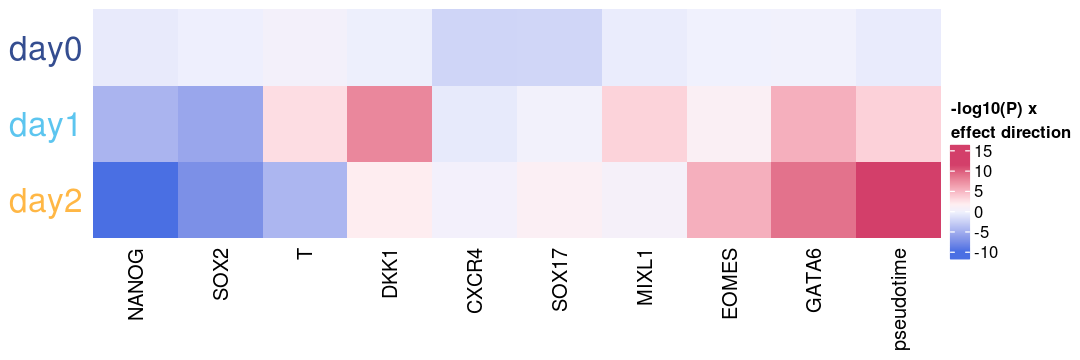

In [20]:
options(repr.plot.width = 9, repr.plot.height = 3)
Heatmap(t(mat), 
        show_row_dend = F, show_column_dend = F, 
        show_column_names = T, show_row_names = T, 
        cluster_rows = F,  row_names_side = "left",
        name = "-log10(P) x \neffect direction",
        row_names_gp = gpar(col = c("#344d90", "#5cc5ef","#ffb745"), fontsize = 20),
        col = diverge_hcl(12, c = 100, l = c(50,100), power = 1))